In [54]:
import nltk
import spacy
# nltk.download([
# "names",
# "stopwords",
# "state_union",
# "twitter_samples",
# "movie_reviews",
# "averaged_perceptron_tagger",
# "vader_lexicon",
# "punkt",
# ... ])
from nltk.tokenize import word_tokenize
import pandas as pd
import pandas

In [ ]:
data = pd.read_csv("data.csv")

In [10]:
nlp = spacy.load('en_core_web_sm')

In [26]:
def tokenize(doc, lemmatized=False, remove_stopword=False, 
                   remove_punct = True, pos_tag = False):
    doc = doc.replace('\r\n', ' ').strip()
    t = nlp(doc)
    tokens = []
    for token in t:
        tokens.append((token.text.lower(),token.lemma_,token.is_stop,token.is_punct,token.pos_))
    if remove_stopword:
        tokens = [i for i in tokens if not i[2]]
    if remove_punct:
        tokens = [i for i in tokens if not i[3]]
    if lemmatized and pos_tag:
        tokens = [(i[1],i[4]) for i in tokens]
        return tokens
    if lemmatized:
        tokens = [i[1] for i in tokens]
        return tokens
    if pos_tag:
        tokens = [(i[0],i[4]) for i in tokens]
        return tokens 
    tokens = [i[0] for i in tokens]
    return tokens


In [13]:
data_analysis = data.copy()

In [28]:
data_analysis['tokenized'] = data_analysis['transcript'].map(lambda x: tokenize(x, remove_stopword=True, remove_punct=True))

In [35]:
data_analysis = data_analysis[data_analysis['person'].isin(['Kamala Harris', 'Joseph R. Biden'])]

In [37]:
data_analysis.reset_index(drop=True, inplace=True)

In [40]:
candidate_tokens = data_analysis.groupby('person')['tokenized'].sum()

In [48]:
candidate_tokens

person
Joseph R. Biden    [campaign, continues, growing, super, tuesday,...
Kamala Harris      [suspending, campaign, today, months, ago, lau...
Name: tokenized, dtype: object

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

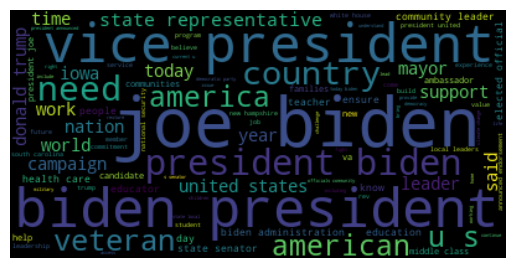

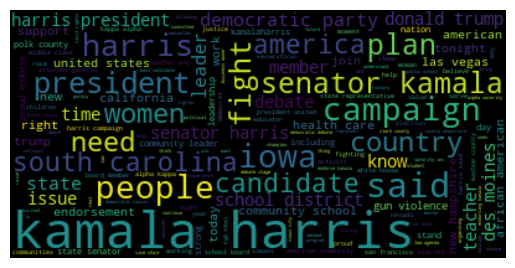

In [53]:
for token in candidate_tokens:
    text = ' '.join(token)
    wc = WordCloud().generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [57]:
candidate_tokens[0]

['campaign',
 'continues',
 'growing',
 'super',
 'tuesday',
 'infrastructure',
 'today',
 'biden',
 'president',
 'adding',
 'staff',
 'growing',
 'super',
 'tuesday',
 'team',
 'tapping',
 'fernando',
 'mercado',
 'virginia',
 'state',
 'director',
 'travis',
 'brimm',
 'north',
 'carolina',
 'state',
 'director',
 'thrilled',
 'expand',
 'super',
 'tuesday',
 'team',
 'virginia',
 'north',
 'carolina',
 'experienced',
 'democratic',
 'strategists',
 'help',
 'grow',
 'joe',
 'biden',
 'diverse',
 'broad',
 'enduring',
 'coalition',
 'south',
 'said',
 'molly',
 'ritner',
 'director',
 'super',
 'tuesday',
 'states',
 'biden',
 'president',
 'fernando',
 'travis',
 'deep',
 'roots',
 'states',
 'united',
 'virginians',
 'north',
 'carolinians',
 'tough',
 'districts',
 'help',
 'elect',
 'democrats',
 'ballot',
 'fernando',
 'travis',
 'helm',
 'campaign',
 'position',
 'strength',
 'build',
 'support',
 'pick',
 'delegates',
 'win',
 'south',
 'biden',
 'president',
 'previously',
 

In [ ]:
biden_tokens 

In [65]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(candidate_tokens)

# Create Corpus
texts = candidate_tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:][0][:30])

[(0, 159), (1, 1), (2, 35), (3, 1), (4, 2), (5, 2), (6, 2), (7, 14), (8, 4), (9, 1), (10, 1), (11, 2), (12, 2), (13, 13), (14, 1), (15, 15), (16, 4), (17, 2), (18, 1), (19, 2), (20, 2), (21, 3), (22, 1), (23, 1), (24, 1), (25, 8), (26, 3), (27, 1), (28, 1), (29, 1)]


In [76]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"biden" + 0.014*"state" + 0.013*"president" + 0.009*"joe" + '
  '0.006*"harris" + 0.005*"campaign" + 0.005*"iowa" + 0.005*"country" + '
  '0.004*"today" + 0.004*"community"'),
 (1,
  '0.014*"president" + 0.012*"biden" + 0.011*"state" + 0.008*"harris" + '
  '0.006*"joe" + 0.005*"iowa" + 0.005*"community" + 0.005*"kamala" + '
  '0.004*"democratic" + 0.004*"country"'),
 (2,
  '0.011*"biden" + 0.011*"state" + 0.010*"president" + 0.009*"harris" + '
  '0.008*"kamala" + 0.007*"joe" + 0.005*"said" + 0.005*"county" + '
  '0.004*"country" + 0.004*"iowa"'),
 (3,
  '0.013*"biden" + 0.013*"state" + 0.013*"president" + 0.009*"kamala" + '
  '0.008*"joe" + 0.008*"harris" + 0.005*"county" + 0.005*"democratic" + '
  '0.005*"campaign" + 0.005*"senator"'),
 (4,
  '0.015*"harris" + 0.013*"president" + 0.010*"biden" + 0.009*"kamala" + '
  '0.008*"state" + 0.007*"joe" + 0.006*"democratic" + 0.005*"iowa" + '
  '0.005*"campaign" + 0.005*"county"'),
 (5,
  '0.019*"harris" + 0.011*"president" + 0.0

In [75]:
import gensim

In [85]:
os.getcwd()

'D:\\Stevens\\Academics\\Semester 3\\BIA 660A - Web Mining\\Project\\webminingproject'

In [88]:
import pyLDAvis.gensim
import pickle
import os
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.000106  0.004166       1        1  66.849509
5     -0.009240 -0.000961       2        1  17.914416
4     -0.005548  0.000809       3        1  10.633948
8     -0.003155  0.000299       4        1   3.013186
7      0.004888  0.001170       5        1   1.153545
0      0.008143  0.000456       6        1   0.387386
6      0.001057  0.000601       7        1   0.047216
3      0.000138 -0.000491       8        1   0.000264
2     -0.000405 -0.002353       9        1   0.000264
1      0.004016 -0.003696      10        1   0.000264, topic_info=           Term         Freq        Total Category  logprob  loglift
4880  president  1329.000000  1329.000000  Default  30.0000  30.0000
830       biden  1117.000000  1117.000000  Default  29.0000  29.0000
3015     harris  1067.000000  1067.000000  Default  28.0000  28.0000
5943      state   685.000000   685.000000  Default  27.0000  27.0000
3571     kamala   650.000000   650.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4355        new     0.000654   323.564450  Topic10  -5.7292  -0.2692
3571     kamala     0.000909   650.164279  Topic10  -5.3995  -0.6373
5532       said     0.000641   327.783414  Topic10  -5.7494  -0.3024
5644    senator     0.000684   409.696600  Topic10  -5.6838  -0.4599
1069   campaign     0.000709   477.109115  Topic10  -5.6484  -0.5767

[902 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.694674       
0         2  0.165399       
0         3  0.094513       
0         4  0.028354       
0         5  0.014177       
...     ...       ...    ...
6896      1  0.590766  young
6896      2  0.268530  young
6896      3  0.089510  young
6896      4  0.035804  young
6921      1  0.705555  único

[1574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 6, 5, 9, 8, 1, 7, 4, 3, 2])